# ПМ3-4. Васильев Никита. Павлов Никита.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

## Задание 1.

In [11]:
data_1 = pd.read_csv('FirstandSecond.csv', decimal=',', sep=';', index_col='t')

In [12]:
data_1

,Y
t,
1,130.025
2,129.395
3,131.150
4,133.385
5,151.775
6,155.495
7,147.770
8,118.130
9,123.860


In [13]:
median_1 = data_1.sort_values('Y').median()

In [14]:
data_1['Series'] = data_1>median_1
data_1

,Y,Series
t,,
1,130.025,False
2,129.395,False
3,131.150,False
4,133.385,False
5,151.775,True
6,155.495,True
7,147.770,True
8,118.130,False
9,123.860,False


In [15]:
data_1.Series.iloc[3]

False

In [16]:
v = 0 #кол-во серий
t = 0 #самая длинная серия
j = 1 #счётчик серии
for i in range(0,len(data_1.Series)-1):
    if(data_1.Series.iloc[i] == data_1.Series.iloc[i+1]):
        j+=1
    else:
        v+=1
        if(j>t):
            t = j
        j = 1
    if(i == len(data_1.Series)-2):
        if(j > t):
            t = j
v+=1
print('Кол-во серий:', v)
print('Самая длинная серия:', t)

Кол-во серий: 6
Самая длинная серия: 6


In [17]:
n = len(data_1)
v_krit = (0.5*(n + 1 - stats.norm.ppf(0.975)*math.sqrt(n-1)))//1
v_krit

6.0

In [18]:
t_krit = (3.3*(math.log10(n)+1))//1
t_krit

7.0

In [19]:
if((v<v_krit) & (t>t_krit)):
    print('Гипотеза об отсутствии тренда принимается')
else:
    print('Гипотеза об отсутствии тренда отвергается')

Гипотеза об отсутствии тренда отвергается


## Задание 2.

In [20]:
data_2 = pd.read_csv('FirstandSecond.csv', decimal=',', sep=';', index_col='t')

In [21]:
l = []
for i in range(len(data_2)-1):
    if(data_2.Y.iloc[i+1]>data_2.Y.iloc[i]):
        l.append(True)
    elif(data_2.Y.iloc[i+1]==data_2.Y.iloc[i]):
        if(data_2.Y.iloc[i]>0):
            l.append(True)
        else:
            l.append(False)
    else:
        l.append(False)
n = len(data_2)
if(data_2.Y.iloc[n-1]>0):
    l.append(True)
else:
    l.append(False)

In [22]:
data_2['Series']=l
data_2

,Y,Series
t,,
1,130.025,False
2,129.395,True
3,131.150,True
4,133.385,True
5,151.775,True
6,155.495,False
7,147.770,False
8,118.130,True
9,123.860,True


In [23]:
v = 0 #кол-во серий
t = 0 #самая длинная серия
j = 1 #счётчик серии
for i in range(0,len(data_2.Series)-1):
    if(data_2.Series.iloc[i] == data_2.Series.iloc[i+1]):
        j+=1
    else:
        v+=1
        if(j>t):
            t = j
        j = 1
    if(i == len(data_2.Series)-2):
        if(j > t):
            t = j
v+=1
print('Кол-во серий:', v)
print('Самая длинная серия:', t)

Кол-во серий: 10
Самая длинная серия: 5


In [24]:
n = len(data_2)
v_krit = (1/3*(2*n-1)-stats.norm.ppf(0.975)*math.sqrt((16*n-29)/90))//1
print(v_krit)
t_krit = 5

9.0


In [25]:
if((v>v_krit) & (t<=t_krit)):
    print('Гипотеза об отсутствии тренда принимается')
else:
    print('Гипотеза об отсутствии тренда отвергается')

Гипотеза об отсутствии тренда принимается


## Задание 3

In [26]:
data_3 = pd.read_csv('Third.csv', decimal=',', sep=';', index_col='Дата')

In [27]:
data_3

,Продажи руб.
Дата,
01.01.2011,20385593
01.02.2011,26716093
01.03.2011,28943801
01.04.2011,27916278
01.05.2011,27688189
01.06.2011,29599761
01.07.2011,31656901
01.08.2011,29371412
01.09.2011,28225881


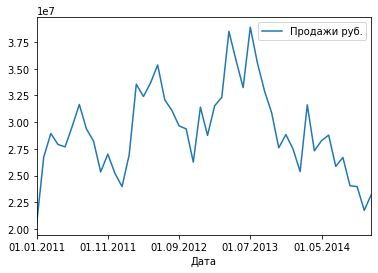

In [28]:
data_3.plot()

In [29]:
alpha_1 = np.arange(0.05,1,0.05)
beta_1 = np.arange(0.05,1,0.05)
gamma_1 = np.arange(0.05,1,0.05)

In [30]:
r2_best = 0
for i in alpha_1:
    for j in beta_1:
        for k in gamma_1:
            L = []
            T = []
            S = []
            alpha = i
            beta = j
            gamma = k
            L.append(data_3['Продажи руб.'].iloc[0])
            T.append(0.0)
            S.append(1.0)
            p = 12 # судя по графику, присутствует годовая сезонность
            for ii in range(1, len(data_3['Продажи руб.'])):
                if(ii<p):
                    S_1 = 1.0
                    S.append(1.0)
                else:
                    S_1 = S[ii-p]
                L.append(alpha*data_3['Продажи руб.'].iloc[ii]/S_1+(1-alpha)*(L[ii-1]+T[ii-1]))
                T.append(beta*(L[ii]-L[ii-1])+(1-beta)*T[ii-1])
                if(ii>=p):
                    S.append(gamma*data_3['Продажи руб.'].iloc[ii]/L[ii]+(1-gamma)*S[ii-p])
            Sales_prog = []
            Sales_prog.append(data_3['Продажи руб.'].iloc[0])
            for ii in range(1, 2*p-1):
                Sales_prog.append(L[ii-1]+T[ii-1])
            for ii in range(2*p-1, len(data_3)):
                Sales_prog.append((L[ii-1]+T[ii-1])*S[ii-p])
            r2 = r2_score(data_3['Продажи руб.'], Sales_prog)
            if(r2>r2_best):
                r2_best = r2
                best_alpha = i
                best_beta = j
                best_gamma = k
                best_L = L
                best_T = T
                best_S = S
                best_Sales_prog = Sales_prog

In [32]:
print(r2_best) 
print(best_alpha, best_beta, best_gamma) # подобрали параметры, оптимизируя R^2

0.48549693026653495
0.8 0.05 0.05


In [33]:
data_3['L'] = best_L
data_3['T'] = best_T
data_3['S'] = best_S
data_3['Sales_prog'] = best_Sales_prog

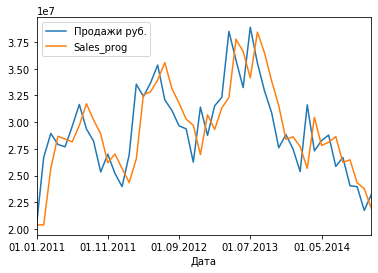

In [34]:
data_3[['Продажи руб.', 'Sales_prog']].plot()

In [35]:
data_3['Error'] = data_3['Продажи руб.'] - data_3['Sales_prog']

In [36]:
data_3['Deviation of the model'] = abs(data_3.Error)/data_3['Продажи руб.']

In [38]:
accuracy = 1 - data_3['Deviation of the model'].mean()
accuracy # точность модели

0.9204496694898238

In [42]:
data_3.index = pd.to_datetime(data_3.index)

In [43]:
new_date = np.array(['2015-01-01', '2015-01-02','2015-01-03','2015-01-04','2015-01-05','2015-01-06','2015-01-07','2015-01-08','2015-01-09','2015-01-10',])

In [44]:
new_date = pd.to_datetime(new_date)

In [45]:
kk = []
for i in range(10):
    kk.append(np.zeros(len(data_3.columns)))

In [46]:
for i in range(10):
    data_3.loc[new_date[i]] = kk[i]

In [47]:
Sales_forecast = []
for i in np.zeros(len(data_3)-10):
    Sales_forecast.append(i)
for i in range(10):
    Sales_forecast.append(L[len(data_3)-11] + (i+1)*T[len(data_3)-11])

In [48]:
data_3['Sales_forecast'] = Sales_forecast

In [50]:
data_3 # посмотрим на полный датафрейм с прогнозом на 10 шагов вперёд

,Продажи руб.,L,T,S,Sales_prog,Error,Deviation of the model,Sales_forecast
Дата,,,,,,,,
2011-01-01,20385593.0,2.038559e+07,0.000000,1.000000,2.038559e+07,0.000000e+00,0.000000,0.000000e+00
2011-01-02,26716093.0,2.544999e+07,253220.000000,1.000000,2.038559e+07,6.330500e+06,0.236955,0.000000e+00
2011-01-03,28943801.0,2.829568e+07,382843.520000,1.000000,2.570321e+07,3.240588e+06,0.111961,0.000000e+00
2011-01-04,27916278.0,2.806873e+07,352353.563200,1.000000,2.867853e+07,-7.622489e+05,0.027305,0.000000e+00
2011-01-05,27688189.0,2.783477e+07,323037.869312,1.000000,2.842108e+07,-7.328923e+05,0.026469,0.000000e+00
2011-01-06,29599761.0,2.931137e+07,380716.095762,1.000000,2.815781e+07,1.441956e+06,0.048715,0.000000e+00
2011-01-07,31656901.0,3.126394e+07,459308.697221,1.000000,2.969209e+07,1.964815e+06,0.062066,0.000000e+00
2011-01-08,29371412.0,2.984178e+07,365235.309624,1.000000,3.172325e+07,-2.351835e+06,0.080072,0.000000e+00
2011-01-09,28225881.0,2.862211e+07,285989.979720,1.000000,3.020701e+07,-1.981133e+06,0.070189,0.000000e+00


## Задание 4

In [51]:
data_4 = pd.read_csv('Fourth.csv', decimal=',', sep=';', index_col='t')

In [52]:
data_4

,y
t,
1,146
2,64
3,73
4,244
5,162
6,34
7,67
8,238
9,133


In [53]:
n = len(data_4)

In [54]:
a0 = data_4.y.sum()/n
a0

125.61538461538461

In [55]:
cos_t = []
sin_t = []
cos_2t = []
sin_2t = []
cos_3t = []
sin_3t = []
ll = 0
for i in range(0,n):
    cos_t.append(np.cos(ll*math.pi))
    sin_t.append(np.sin(ll*math.pi))
    cos_2t.append(np.cos(2*ll*math.pi))
    sin_2t.append(np.sin(2*ll*math.pi))
    cos_3t.append(np.cos(3*ll*math.pi))
    sin_3t.append(np.cos(3*ll*math.pi))
    ll+=(7/n)

In [56]:
data_4['cos_t'] = cos_t
data_4['sin_t'] = sin_t
data_4['cos_2t'] = cos_2t
data_4['sin_2t'] = sin_2t
data_4['cos_3t'] = cos_3t
data_4['sin_3t'] = sin_3t

In [57]:
a1 = sum(data_4.y*data_4.cos_t)*(2/n)
a2 = sum(data_4.y*data_4.cos_2t)*(2/n)
a3 = sum(data_4.y*data_4.cos_3t)*(2/n)

In [58]:
b1 = sum(data_4.y*data_4.sin_t)*(2/n)
b2 = sum(data_4.y*data_4.sin_t)*(2/n)
b3 = sum(data_4.y*data_4.sin_t)*(2/n)

In [59]:
y_t = a0 + a1*data_4.cos_t + b1*data_4.sin_t
y_2t = a0 + a2*data_4.cos_2t + b2*data_4.sin_2t
y_3t = a0 + a3*data_4.cos_3t + b3*data_4.sin_3t

In [60]:
data_4['y_t'] = y_t
data_4['y_2t'] = y_2t
data_4['y_3t'] = y_3t

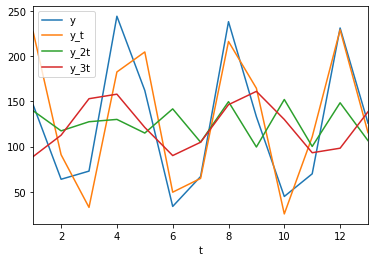

In [61]:
data_4[['y', 'y_t', 'y_2t', 'y_3t']].plot()

In [63]:
r2_4 = r2_score(data_4.y, data_4.y_t) # Видно, что гармоника Фурье a0 + a1cost + a2sint с шагом 7/n(был подобран) описывает исходный ряд с R^2 0.73
r2_4

0.7289189616883291